In [1]:
import numpy as np
import torch
from utils.utils import plot_images
import matplotlib.pyplot as plt

# 1.0 - torch.mean(torch.abs(torch.nn.functional.cosine_similarity(masks_pred[:, :, 1], true_masks.view(images.shape[0],-1))))


img1 = np.load('images.np.npy').transpose((0, 2, 3, 1))
img2 = np.load('images2.np.npy').transpose((0, 2, 3, 1))
img3 = np.load('images3.np.npy').transpose((0, 2, 3, 1))

pred1 = np.load('masks_pred.npy')[:,:,1].reshape(-1,48,48)
pred2 = np.load('masks_pred2.npy')[:,:,1].reshape(-1,48,48)
pred3 = np.load('masks_pred3.npy')[:,:,1].reshape(-1,48,48)

true1 = np.load('true_mask.npy')
true2 = np.load('true_mask2.npy')
true3 = np.load('true_mask3.npy')


print(img1.shape)
print(pred1.shape)
print(true1.shape)


(10, 48, 48, 3)
(10, 48, 48)
(10, 48, 48)


-0.06733071804046631 0.0867467075586319 -1.984598748094868e-05


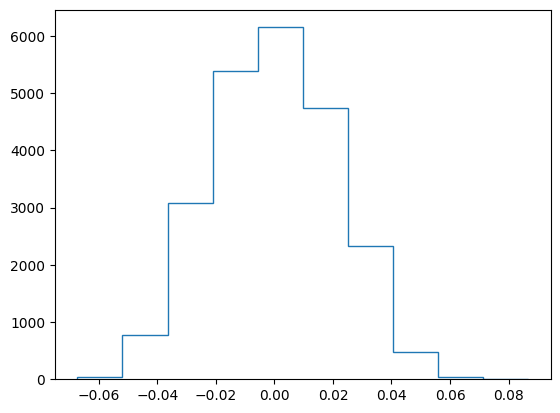

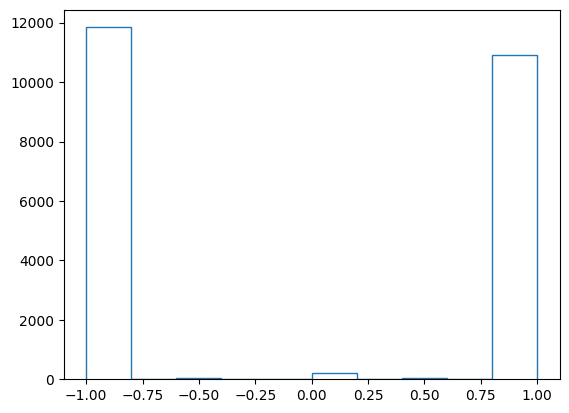

In [2]:
# plot_images(img3[:4])
# plot_images((pred3[:4] > 0).astype(int))
# plot_images(true3[:4])

print(f'{np.min(pred3)} {np.max(pred3)} {np.mean(pred3)}')

# plt.show()

counts, bins = np.histogram(pred3.flatten())
plt.stairs(counts, bins)
plt.show()

counts, bins = np.histogram(true3.flatten())
plt.stairs(counts, bins)
plt.show()

def plt_bins(matrix):
    counts, bins = np.histogram(matrix.flatten())
    plt.stairs(counts, bins)

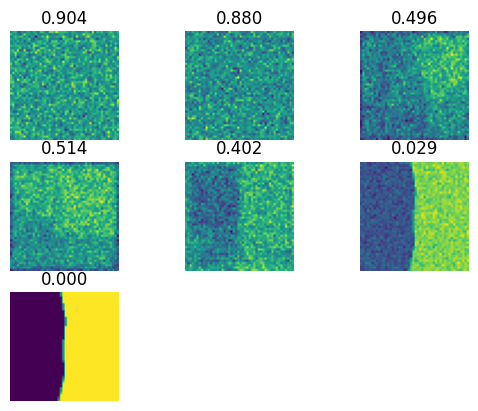

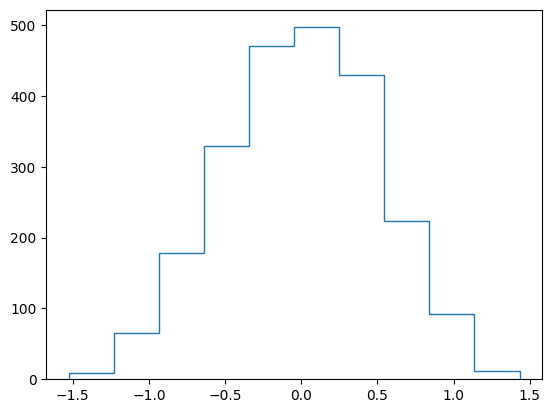

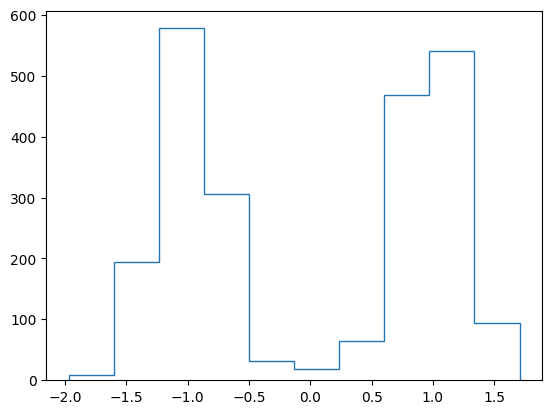

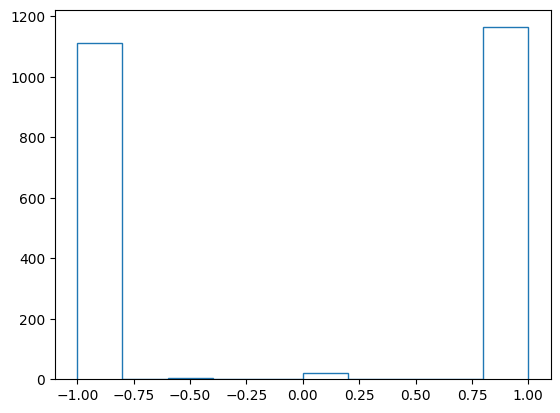

In [9]:
from functools import partial
import torch.nn.functional as F

rand1 = torch.randn(10, 48, 48)
rand2 = torch.randn(10, 48, 48) * 2 - 1


def loss_func(feat1, feat2):
    # minimize average magnitude of cosine similarity
    return 1 - F.cosine_similarity(feat1, feat2).abs().mean()

# def loss_func(feat1, feat2):
#     # minimize average cosine similarity
#     return F.cosine_similarity(feat1, feat2).mean()

# def loss_func(feat1, feat2):
#     # maximize average magnitude of cosine similarity
#     return -F.cosine_similarity(feat1, feat2).abs().mean()

# def loss_func(feat1, feat2):
#     # maximize average cosine similarity
#     return -F.cosine_similarity(feat1, feat2).mean()

rand_loss1 = loss_func(rand1[0], torch.tensor(true1[0]))
rand_loss2 = loss_func(rand2[0], torch.tensor(true1[0]))

loss1 = loss_func(torch.tensor(pred1[0]), torch.tensor(true1[0]))
loss2 = loss_func(torch.tensor(pred2[0]), torch.tensor(true2[0]))
loss3 = loss_func(torch.tensor(pred3[0]*48/2), torch.tensor(true3[0]))

loss4 = loss_func(torch.tensor(true3[0]+rand1[0].numpy()/4), torch.tensor(true3[0]))
loss5 = loss_func(torch.tensor(true3[0]), torch.tensor(true3[0]))

plot_images([rand1[0], rand2[0], pred1[0], pred2[0], pred3[0]*48/2, true3[0]+rand1[0].numpy()/4,true3[0]], ["{:.{}f}".format(rand_loss1, 3), "{:.{}f}".format(rand_loss2, 3), "{:.{}f}".format(loss1, 3), "{:.{}f}".format(loss2, 3), "{:.{}f}".format(loss3, 3), "{:.{}f}".format(loss4, 3), "{:.{}f}".format(loss5, 3)])
plt.show()

plt_bins(pred3[0]*(48/2))
plt.show()
plt_bins(true3[0]+rand1[0].numpy()/4)
plt.show()
plt_bins(true3[0])